# Assignment de Classificação- Heart disease UCI

INFORMAÇÕES DO DATASET:
- age: Idade (Anos)
- sex: Sexo (1 = Masc e 0 = Fem)
- cp: Nível de dor ( 1 a 4 )
- trestbps: Pressão sanguínea em Repouso
- chol: colesterol em mg/dl:
- fbs: Fasting Blood Sugar (Teste diabético) > 120 mg/dl
- restecg: Eletrocardiogramas em repouso (0,1 ou 2)
- thalach: Ritmo cardíaco
- exang: Exercício físico que gerou Angina
- oldpeak: Depressão de ST induzida por exercício em relação ao
repouso
- slope: Tipo de inclinação do segmento ST de pico do exercício
- ca: número de vasos sanguínios ressaltados (coloridos por
fluoroscopia)
- thal: Talassemia -> 3 = normal; 6 = fixed defect; 7 = reversable
defect

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df= pd.read_csv('/content/heart.csv')

In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Questão 1 - Dentre as 14 características apresentadas, quantas são categóricas e quais são elas? Lembrando que variáveis inteiras que apresentem uma relação de grandeza crescente e variáveis booleanas (quando é somente 0 ou 1 a coluna) não são consideradas categóricas.

2 Variáveis sendo elas : restecg e slope

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Questão 2 - Realizando o cálculo de correlação, sem aplicar nenhum método de feature engineering, qual é a variável numérica (não categórica ou booleana) que gerou, em módulo, maior correlação com o target (variável alvo)?
cp

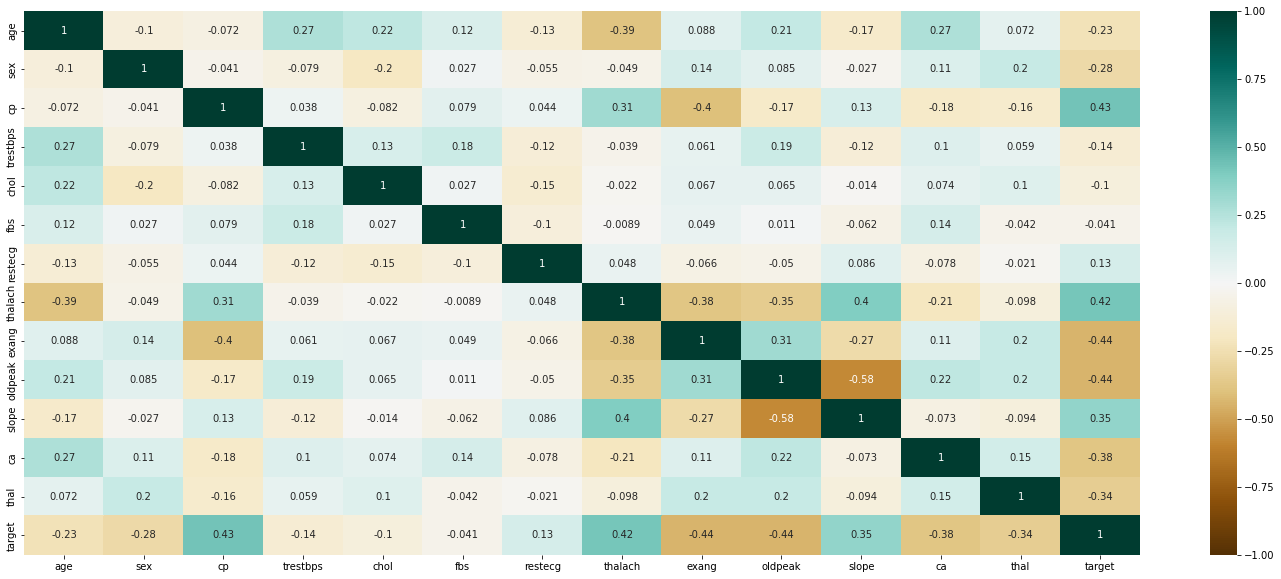

In [9]:
plt.figure(figsize=(25, 10))
heatmap=sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

## Normalizar os dados

In [11]:
X= df.drop(columns=['target'])
y=df['target']

In [13]:
from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler()
Scaler.fit_transform(X, y)

array([[-0.26843658,  0.66150409, -0.91575542, ...,  0.99543334,
         1.20922066,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459, -0.52212231],
       [-0.4889957 , -1.51170646, -0.91575542, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-0.04787747,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459,  1.08985168]])

## Questão 3 - Para que serve a matriz de confusão?
Todas as alternativas anteriores.

In [14]:
X_train, X_test, y_train, y_test= train_test_split( X, y, test_size=0.2, random_state=42)

## Questão 4 - Realize uma redução de dimensionalidade utilizando o PCA (sklearn) para duas dimensões. Crie um scatter plot utilizando o x e y criado e usando o hue como target é possível afirmar que quais destes modelos de classificação não irá performar bem?

- Decision Tree
- SVM com Kernel Polinomial
- SVM com Kernel Linear X
- Redes Neurais

In [15]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X) 

print(pca.explained_variance_ratio_)

print(pca.singular_values_)


[0.74530931 0.15199174]
[1654.17416465  747.00405399]


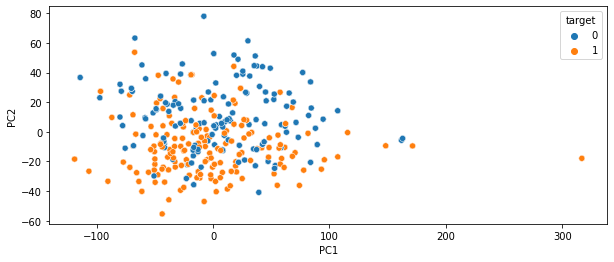

In [16]:
plt.figure(figsize=(10 ,4))
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Questão 5 - Quais as diferenças entre Acurácia, Precisão, Recall (Sensibilidade) e F1-Score?

Acurácia é o número de resultados corretos dividido pelo total de predições, 

Precisão é a razão entre os valores previstos pertencentes como positivo sobre toda a classe positiva,

 Recall é a razão de todos os valores pertencentes à classe positiva que o modelo previu corretamente 
 
  F1-Score é média harmônica entre precisão e recall.

## Aplicar o modelo de Classificação: Regressão logistica 

In [17]:
cls = LogisticRegression().fit(X_train, y_train)
cls

LogisticRegression()

In [18]:
y_pred= cls.predict(X_test)

## Métricas de avaliação

In [19]:
from sklearn.metrics import f1_score

f1score = f1_score(y_test, y_pred)
print('F1 Score:  {:3.4%}'.format(f1score))

F1 Score:  80.3571%


## Encontrando os melhores hiperparâmetros 

In [20]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.848480 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.842953 (0.035368) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.844895 (0.034250) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.842953 (0.035368) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.841326 (0.034425) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.845222 (0.035180) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.843927 (0.035173) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.844235 (0.032969) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.846840 (0.033014) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.848480 (0.035604) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.843261 (0.035346) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.846519 (0.035352) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.845545 (0.035536) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.820817 (0.035404) wit

## Aplicando os novos hiperparâmetros 

In [21]:
cls_tunned = LogisticRegression(C=1.0, penalty='l2', solver='newton-cg', max_iter=10000).fit(X_train, y_train)
y_pred_tunned= cls.predict(X_test)

## Testanto o F1 Score

In [22]:
f1score = f1_score(y_test, y_pred_tunned)
print('F1 Score:  {:3.4%}'.format(f1score))

F1 Score:  80.3571%
